#### Using master branch on AllenSDK and master branch on VBA (current as of 5/18/20)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

### get experiments to analyze

The VBA <code>data_access</code> module provides useful functions for identifying and loading experiments to analyze. 

In [3]:
import visual_behavior.data_access.loading as loading

The <code>get_filtered_ophys_experiment_table()</code> function returns a table describing passing ophys experiments from relevant project codes 

In [4]:
experiments_table = loading.get_filtered_ophys_experiment_table() 

In [5]:
experiments_table.head()

,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,...,driver_line,imaging_depth,targeted_structure,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,location
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
953659743,952430817,952554548,1018028345,VisualBehaviorMultiscope,holding,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,...,['Sst-IRES-Cre'],225,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,Sst_VISp_225
953659749,952430817,952554548,1018028354,VisualBehaviorMultiscope,holding,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,...,['Sst-IRES-Cre'],150,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,Sst_VISl_150
953659752,952430817,952554548,1018028357,VisualBehaviorMultiscope,holding,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,...,['Sst-IRES-Cre'],225,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,Sst_VISl_225
953659745,952430817,952554548,1018028339,VisualBehaviorMultiscope,holding,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,...,['Sst-IRES-Cre'],75,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,Sst_VISp_75
958527481,954954402,953982960,1018028357,VisualBehaviorMultiscope,holding,passed,20190924_457841_3imagesA,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000,...,['Sst-IRES-Cre'],225,VISl,NaN,850862430,Sst-IRES-Cre,NaN,NaN,0,Sst_VISl_225


In [6]:
# get some experiment
aribtrary_index = 699
ophys_experiment_id = experiments_table.index.values[aribtrary_index]

In [7]:
experiments_table.iloc[aribtrary_index]

ophys_session_id                                                     918718550
behavior_session_id                                                  918953326
container_id                                                         911248946
project_code                                              VisualBehaviorTask1B
container_workflow_state                                          container_qc
experiment_workflow_state                                               passed
session_name                                          20190807_3imagesB_retake
session_type                                                  OPHYS_3_images_B
equipment_name                                                         CAM2P.5
date_of_acquisition                                 2019-08-07 15:14:52.000000
isi_experiment_id                                                    883781677
specimen_id                                                          870720274
sex                                                 

### get SDK dataset through VBA loading function

The <code>get_ophys_dataset</code> function in <code>data_access.loading</code> returns an AllenSDK session object for a single imaging plane.

In [8]:
help(loading.get_ophys_dataset)

Help on function get_ophys_dataset in module visual_behavior.data_access.loading:

get_ophys_dataset(ophys_experiment_id, include_invalid_rois=False)
    Gets behavior + ophys data for one experiment (single imaging plane), using the SDK LIMS API, then reformats & filters to compensate for bugs and missing SDK features.
        This functionality should eventually be entirely replaced by the SDK when all requested features have been implemented.
    
    Arguments:
        ophys_experiment_id {int} -- 9 digit ophys experiment ID
        include_invalid_rois {Boolean} -- if True, return all ROIs including invalid. If False, filter out invalid ROIs
    
    Returns:
        BehaviorOphysDataset {object} -- BehaviorOphysDataset instance, inherits attributes & methods from SDK BehaviorOphysSession class



In [9]:
# help(loading.BehaviorOphysDataset)

In [10]:
# this function gets an SDK session object then does a bunch of reformatting to fix things
dataset = loading.get_ophys_dataset(ophys_experiment_id, include_invalid_rois=False)

The dataset object has attributes for relevant datastreams including: <code>max_projection, dff_traces, running_speed, stimulus_presentations, and eye_tracking</code>

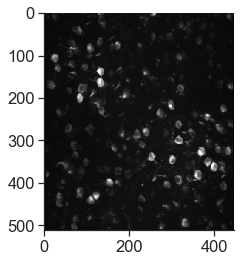

In [11]:
plt.imshow(dataset.max_projection, cmap='gray')

In [12]:
dataset.dff_traces.head()

,cell_roi_id,dff
cell_specimen_id,,
1007039702,919398864,"[0.3119690209088626, 0.5724086534725902, 0.324..."
1007041618,919398868,"[0.37921964653516843, 0.4358567321868354, 0.45..."
1007040159,919398878,"[0.5743892327747321, 0.4591228947252076, 0.547..."
1007036276,919398883,"[0.39800917866269775, 0.2831997308081784, 0.23..."
1007038184,919398888,"[0.2770813494803314, 0.4606271141418851, 0.375..."


In [13]:
dataset.ophys_timestamps

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


array([2.79693000e+00, 2.82922000e+00, 2.86152000e+00, ...,
       4.52992615e+03, 4.52995847e+03, 4.52999078e+03])

In [14]:
cell_specimen_ids = dataset.cell_specimen_ids
cell_specimen_id = cell_specimen_ids[5]

C:\Users\marinag\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\marinag\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Text(0, 0.5, 'dF/F')

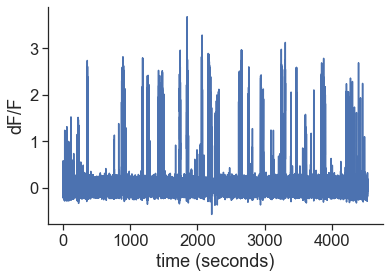

In [15]:
plt.plot(dataset.ophys_timestamps, dataset.dff_traces.loc[cell_specimen_id, 'dff'])
plt.xlabel('time (seconds)')
plt.ylabel('dF/F')

Text(0, 0.5, 'run speed (cm/s)')

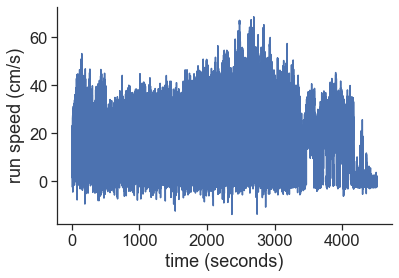

In [16]:
plt.plot(dataset.stimulus_timestamps, dataset.running_speed['speed'])
plt.xlabel('time (seconds)')
plt.ylabel('run speed (cm/s)')

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


Text(0, 0.5, 'pupil width (pixels?)')

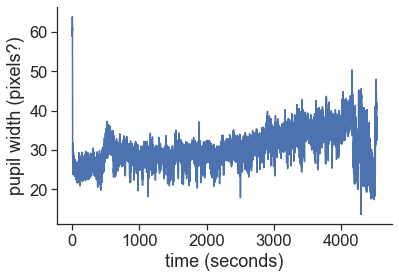

In [17]:
plt.plot(dataset.eye_tracking.time, dataset.eye_tracking.pupil_width)
plt.xlabel('time (seconds)')
plt.ylabel('pupil width (pixels?)')

In [18]:
# basic stimulus information
dataset.stimulus_presentations.head(10)

,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change
stimulus_presentations_id,,,,,,,,,
0,0.25029,18002.0,0,im000,False,17987,306.29391,306.54420,False
1,0.25019,18047.0,0,im000,False,18032,307.04426,307.29445,False
2,NaN,NaN,8,omitted,True,18076,307.77817,NaN,False
3,0.25020,18137.0,0,im000,False,18122,308.54546,308.79566,False
4,0.25021,18182.0,0,im000,False,18167,309.29607,309.54628,False
5,0.25017,18227.0,0,im000,False,18212,310.04669,310.29686,False
6,0.25020,18272.0,0,im000,False,18257,310.79727,311.04747,False
7,0.25019,18317.0,0,im000,False,18302,311.54789,311.79808,False
8,0.25021,18362.0,0,im000,False,18347,312.29850,312.54871,False


In [19]:
# stimulus information with many extra columns
dataset.extended_stimulus_presentations.head(10)

,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change,mean_running_speed,licks,rewards,time_from_last_lick,time_from_last_reward,time_from_last_change,flash_after_omitted,flash_after_change
stimulus_presentations_id,,,,,,,,,,,,,,,,,
0,0.25029,18002.0,0,im000,False,17987,306.29391,306.54420,False,5.764479,"[306.8063439302314, 306.9064335597303, 307.006...",[],17.168627,NaN,NaN,False,False
1,0.25019,18047.0,0,im000,False,18032,307.04426,307.29445,False,10.960220,[],[],0.037761,NaN,NaN,False,False
2,NaN,NaN,8,omitted,True,18076,307.77817,NaN,False,4.514954,[],[],0.771671,NaN,NaN,False,False
3,0.25020,18137.0,0,im000,False,18122,308.54546,308.79566,False,5.384037,[],[],1.538961,NaN,NaN,True,False
4,0.25021,18182.0,0,im000,False,18167,309.29607,309.54628,False,1.691917,[],[],2.289571,NaN,NaN,False,False
5,0.25017,18227.0,0,im000,False,18212,310.04669,310.29686,False,15.551163,[],[],3.040191,NaN,NaN,False,False
6,0.25020,18272.0,0,im000,False,18257,310.79727,311.04747,False,15.656563,[],[],3.790771,NaN,NaN,False,False
7,0.25019,18317.0,0,im000,False,18302,311.54789,311.79808,False,19.621684,[],[],4.541391,NaN,NaN,False,False
8,0.25021,18362.0,0,im000,False,18347,312.29850,312.54871,False,19.356155,[],[],5.292001,NaN,NaN,False,False


In [20]:
# behavioral trial information
dataset.trials.head(10)

,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,go,catch,...,correct_reject,start_time,stop_time,trial_length,response_time,change_frame,change_time,response_latency,initial_image_name,change_image_name
trials_id,,,,,,,,,,,,,,,,,,,,,
0,"[306.8063439302314, 306.9064335597303, 307.006...",NaN,0.000,False,False,False,False,True,False,False,...,False,306.260349,307.327350,1.067001,NaN,NaN,NaN,NaN,im000,im000
1,[313.39500698247446],NaN,0.000,False,False,False,False,True,False,False,...,False,307.761174,313.716097,5.954922,NaN,NaN,NaN,NaN,im000,im000
2,[319.38320715408963],NaN,0.000,False,False,False,False,True,False,False,...,False,313.766162,319.704022,5.937860,NaN,NaN,NaN,NaN,im000,im000
3,"[326.9727132546828, 327.2062401201024, 327.322...",326.685633,0.005,False,False,False,True,False,False,False,...,False,319.771400,330.796498,11.025098,NaN,19201.0,326.56008,0.412633,im000,im045
4,"[332.82747238704513, 333.1443790933893]",NaN,0.000,False,False,False,False,True,False,False,...,False,331.030011,333.148279,2.118268,NaN,NaN,NaN,NaN,im045,im045
5,[334.41235465496504],NaN,0.000,False,False,False,False,True,False,False,...,False,333.281800,334.732894,1.451094,NaN,NaN,NaN,NaN,im045,im045
6,"[336.61388531753045, 336.81404702269174]",NaN,0.000,False,False,False,False,True,False,False,...,False,334.782988,337.135025,2.352037,NaN,NaN,NaN,NaN,im045,im045
7,[337.99862987053115],NaN,0.000,False,False,False,False,True,False,False,...,False,337.785762,338.319644,0.533881,NaN,NaN,NaN,NaN,im045,im045
8,[339.58297031006185],NaN,0.000,False,False,False,False,True,False,False,...,False,338.536417,339.903812,1.367395,NaN,NaN,NaN,NaN,im045,im045


### ResponseAnalysis class provides access to time aligned cell responses for trials, stimuli, and omissions

VBA also has useful functionality for creating data frames with cell traces aligned to the time of stimulus presentations, omissions, or behavioral trials. 

In [21]:
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis

In [22]:
help(ResponseAnalysis)

Help on class ResponseAnalysis in module visual_behavior.ophys.response_analysis.response_analysis:

class ResponseAnalysis(builtins.object)
 |  ResponseAnalysis(dataset, analysis_cache_dir=None, load_from_cache=False, use_events=False, use_extended_stimulus_presentations=False, overwrite_analysis_files=False)
 |  
 |  Contains methods for organizing cell responses by trials, stimulus presentations, or omissions in a DataFrame.
 |  
 |  For each trial, stimulus presentation, or omission, a segment of the dF/F trace (or events if available and use_events=True) is extracted for each cell aligned to the time of the relevant event (ex: at the change time for each trial).
 |  The duration of each trace segment is a window around the event time, with default values for trials = [-5,5], stimulus presentations = [-0.5,0.75], and omissions = [-5,5].
 |  The mean_response for each cell is taken in a 500ms window after the change time or stimulus onset time, or in a 750ms window after omission ti

In [23]:
analysis = ResponseAnalysis(dataset) 

### Get cell traces for all stimulus presentations 

In [24]:
stim_response_df = analysis.get_response_df(df_name='stimulus_response_df')

C:\Users\marinag\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [25]:
stim_response_df.keys() 

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_gray_screen', 'p_value_omission', 'p_value_stimulus',
       'p_value_baseline', 'duration', 'end_frame', 'image_index',
       'image_name', 'omitted', 'start_frame', 'start_time', 'stop_time',
       'change'],
      dtype='object')

In [26]:
stim_response_df.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,p_value_baseline,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change
0,0,1007039702,"[-0.04163924037046436, -0.11103054626290901, -...","[-0.48467220810642986, -0.45236072756600115, -...",0.034933,0.007417,0.0723,0.0461,0.1023,0.322702,0.25029,18002.0,0,im000,False,17987,306.29391,306.5442,False
1,0,1007041618,"[-0.026498959490611696, -0.1870510834131472, 0...","[-0.48467220810642986, -0.45236072756600115, -...",0.016086,-0.008264,0.3014,0.1685,0.3505,0.611723,0.25029,18002.0,0,im000,False,17987,306.29391,306.5442,False
2,0,1007040159,"[0.02342435551956518, -0.09674031596455424, 0....","[-0.48467220810642986, -0.45236072756600115, -...",0.056637,-0.010609,0.0228,0.0041,0.0454,0.037283,0.25029,18002.0,0,im000,False,17987,306.29391,306.5442,False
3,0,1007036276,"[0.05683151269551682, 0.0607892510563093, -0.1...","[-0.48467220810642986, -0.45236072756600115, -...",0.039533,-0.016034,0.0810,0.0312,0.0828,0.064160,0.25029,18002.0,0,im000,False,17987,306.29391,306.5442,False
4,0,1007038184,"[-0.027373399546670278, 0.058469358913724, -0....","[-0.48467220810642986, -0.45236072756600115, -...",0.088872,-0.012655,0.0047,0.0000,0.0060,0.007964,0.25029,18002.0,0,im000,False,17987,306.29391,306.5442,False


#### plot single trial response for some cell

Text(0, 0.5, 'dF/F')

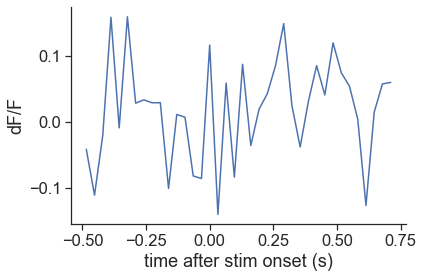

In [27]:
cell_specimen_id = stim_response_df.cell_specimen_id.unique()[0]

trace = stim_response_df[stim_response_df.cell_specimen_id==cell_specimen_id].trace.values[0]
times = stim_response_df[stim_response_df.cell_specimen_id==cell_specimen_id].trace_timestamps.values[0]

plt.plot(times, trace)
plt.xlabel('time after stim onset (s)')
plt.ylabel('dF/F')

#### plot trial averaged trace for some image

Text(0, 0.5, 'dF/F')

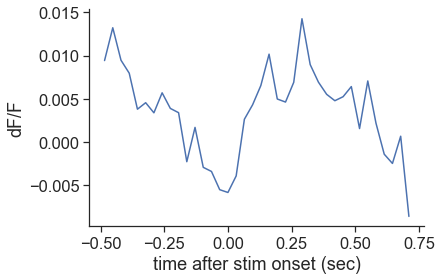

In [28]:
image_name = stim_response_df.image_name.unique()[6]
mean_trace = stim_response_df[(stim_response_df.cell_specimen_id==cell_specimen_id)&
                         (stim_response_df.image_name==image_name)].trace.mean()

plt.plot(times, mean_trace)
plt.xlabel('time after stim onset (sec)')
plt.ylabel('dF/F')


#### responsiveness

Response dataframes include other useful columns including <code>p_value_gray_screen</code> which compares the mean response for each trial to a shuffled distribution of values from the 5 min gray screen periods at the beginning and end of the session.

In [29]:
cell_data = stim_response_df[(stim_response_df.cell_specimen_id==cell_specimen_id)]
fraction_responsive = cell_data.p_value_gray_screen.mean()
print('this cell had a significant response for',fraction_responsive,'of all image presentations')

this cell had a significant response for 0.47761556574286307 of all image presentations


<code>p_value_omission</code> compares the mean response for each trial to a shuffled distribution of all omission responses

<code>p_value_stimulus</code> compares the mean response for each trial to a shuffled distribution of all other stimulus responses

### Get cell responses around change times for behavioral trials

In [30]:
trials_response_df = analysis.get_response_df(df_name='trials_response_df')

In [31]:
trials_response_df.keys()

Index(['trials_id', 'cell_specimen_id', 'trace', 'trace_timestamps',
       'mean_response', 'baseline_response', 'p_value_gray_screen',
       'p_value_omission', 'p_value_stimulus', 'lick_times', 'reward_time',
       'reward_volume', 'hit', 'false_alarm', 'miss', 'stimulus_change',
       'aborted', 'go', 'catch', 'auto_rewarded', 'correct_reject',
       'start_time', 'stop_time', 'trial_length', 'behavioral_response_time',
       'change_frame', 'change_time', 'behavioral_response_latency',
       'initial_image_name', 'change_image_name'],
      dtype='object')

In [32]:
trials_response_df.head()

,trials_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,lick_times,...,correct_reject,start_time,stop_time,trial_length,behavioral_response_time,change_frame,change_time,behavioral_response_latency,initial_image_name,change_image_name
0,3,1007039702,"[0.08622107085198194, 0.0032435151071876223, -...","[-4.975968003226013, -4.943656522685584, -4.91...",0.027749,-0.020282,0.1264,0.0894,0.1514,"[326.9727132546828, 327.2062401201024, 327.322...",...,False,319.7714,330.796498,11.025098,NaN,19201.0,326.56008,0.412633,im000,im045
1,3,1007041618,"[-0.007630321618453601, 0.047171272367094, -0....","[-4.975968003226013, -4.943656522685584, -4.91...",0.007746,0.032044,0.4271,0.3207,0.4802,"[326.9727132546828, 327.2062401201024, 327.322...",...,False,319.7714,330.796498,11.025098,NaN,19201.0,326.56008,0.412633,im000,im045
2,3,1007040159,"[0.0029512773817162857, 0.29477793046877904, -...","[-4.975968003226013, -4.943656522685584, -4.91...",0.056406,0.040323,0.0245,0.0053,0.0424,"[326.9727132546828, 327.2062401201024, 327.322...",...,False,319.7714,330.796498,11.025098,NaN,19201.0,326.56008,0.412633,im000,im045
3,3,1007036276,"[0.048779439056681875, 0.043985522127128474, 0...","[-4.975968003226013, -4.943656522685584, -4.91...",0.089610,-0.011269,0.0423,0.0157,0.0165,"[326.9727132546828, 327.2062401201024, 327.322...",...,False,319.7714,330.796498,11.025098,NaN,19201.0,326.56008,0.412633,im000,im045
4,3,1007038184,"[0.008109525774069148, -0.030011455121239195, ...","[-4.975968003226013, -4.943656522685584, -4.91...",0.038657,-0.012188,0.0220,0.0151,0.0505,"[326.9727132546828, 327.2062401201024, 327.322...",...,False,319.7714,330.796498,11.025098,NaN,19201.0,326.56008,0.412633,im000,im045


Text(0, 0.5, 'dF/F')

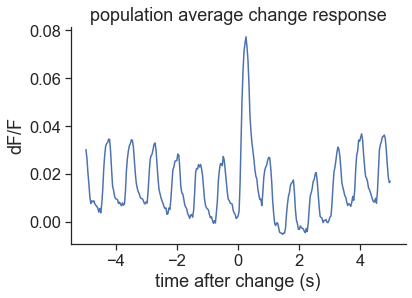

In [33]:
# popuation average response to image change
times = trials_response_df.trace_timestamps.values[0]
plt.plot(times, trials_response_df.trace.mean())
plt.title('population average change response')
plt.xlabel('time after change (s)')
plt.ylabel('dF/F')

### Get omission triggered responses 

In [34]:
omission_response_df = analysis.get_response_df(df_name='omission_response_df')

In [35]:
omission_response_df.keys()

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_gray_screen', 'p_value_omission', 'p_value_stimulus',
       'duration', 'end_frame', 'image_index', 'image_name', 'omitted',
       'start_frame', 'start_time', 'stop_time', 'change'],
      dtype='object')

In [36]:
omission_response_df.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change
0,2,1007039702,"[-0.023209009289872087, 0.07881182813968272, -...","[-4.975968003226013, -4.943656522685584, -4.91...",-0.028280,0.012735,0.9704,0.9061,0.9569,NaN,NaN,8,omitted,True,18076,307.77817,NaN,False
1,2,1007041618,"[0.009174027783683023, 0.08732134728950428, 0....","[-4.975968003226013, -4.943656522685584, -4.91...",-0.028844,0.002263,0.9623,0.8692,0.9562,NaN,NaN,8,omitted,True,18076,307.77817,NaN,False
2,2,1007040159,"[-0.04408940052396268, -0.0643545532531619, 0....","[-4.975968003226013, -4.943656522685584, -4.91...",-0.005106,-0.011556,0.6400,0.4021,0.6905,NaN,NaN,8,omitted,True,18076,307.77817,NaN,False
3,2,1007036276,"[-0.03970235218769648, 0.03193184990968917, -0...","[-4.975968003226013, -4.943656522685584, -4.91...",0.138303,-0.040162,0.0338,0.0166,0.0093,NaN,NaN,8,omitted,True,18076,307.77817,NaN,False
4,2,1007038184,"[0.08438787597198595, 0.06665604761308588, -0....","[-4.975968003226013, -4.943656522685584, -4.91...",-0.018609,0.032927,0.9221,0.8169,0.9191,NaN,NaN,8,omitted,True,18076,307.77817,NaN,False


Text(0, 0.5, 'dF/F')

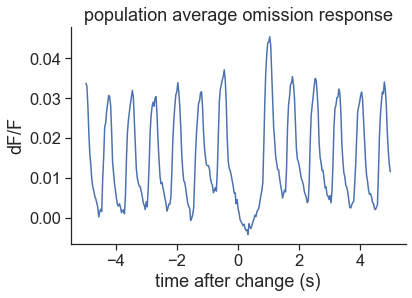

In [37]:
# popuation average response
times = omission_response_df.trace_timestamps.values[0]
plt.plot(times, omission_response_df.trace.mean())
plt.title('population average omission response')
plt.xlabel('time after change (s)')
plt.ylabel('dF/F')

### Get running behavior for omissions 

In [38]:
run_speed_df = analysis.get_response_df(df_name='omission_run_speed_df')

In [39]:
run_speed_df.head()

,index,stimulus_presentations_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change
0,0,2,"[31.604002230997082, 29.869732669494724, 29.20...","[-4.987425801993548, -4.970745448140727, -4.95...",4.514954,10.960220,0.9271,0.8352,0.8640,NaN,NaN,8,omitted,True,18076,307.77817,NaN,False
1,2,57,"[16.311345910332037, 16.311345910332037, 16.33...","[-4.987425801993548, -4.970745448140727, -4.95...",21.880446,20.137662,0.5752,0.5671,0.5680,NaN,NaN,8,omitted,True,20551,349.06172,NaN,False
2,4,91,"[19.021753767420552, 20.529729922571704, 20.52...","[-4.987425801993548, -4.970745448140727, -4.95...",0.689664,1.186246,0.9596,0.9231,0.9271,NaN,NaN,8,omitted,True,22081,374.58286,NaN,False
3,6,96,"[1.3877288399684609, 2.043860457328798, 2.0438...","[-4.987425801993548, -4.970745448140727, -4.95...",3.011756,1.066605,0.9397,0.8497,0.8728,NaN,NaN,8,omitted,True,22306,378.33550,NaN,False
4,8,124,"[-0.29409761948115803, 0.5772667590355125, 2.4...","[-4.987425801993548, -4.970745448140727, -4.95...",29.420144,22.587176,0.1792,0.2068,0.2326,NaN,NaN,8,omitted,True,23566,399.35261,NaN,False


Text(0, 0.5, 'run speed (cm/s)')

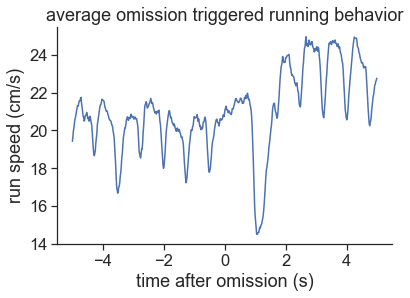

In [40]:
# running speed averaged across all omissions
times = run_speed_df.trace_timestamps.values[0]
plt.plot(times, run_speed_df.trace.mean())
plt.title('average omission triggered running behavior')
plt.xlabel('time after omission (s)')
plt.ylabel('run speed (cm/s)')

## get trial averaged response dataframe for some set of conditions 

VBA <code>response_analysis.utilities</code> has a function for averaging across trials for a given set of conditions: the <code>get_mean_df()</code> function

In [41]:
import visual_behavior.ophys.response_analysis.utilities as utilities

In [42]:
help(utilities.get_mean_df) # needs documentation...

Help on function get_mean_df in module visual_behavior.ophys.response_analysis.utilities:

get_mean_df(response_df, analysis=None, conditions=['cell', 'change_image_name'], flashes=False, omitted=False, get_reliability=False, get_pref_stim=True, exclude_omitted_from_pref_stim=True)



In [43]:
conditions = ['cell_specimen_id', 'image_name'] # conditions to groupby before averaging
mean_df = utilities.get_mean_df(stim_response_df, conditions=conditions, flashes=True)

In [44]:
mean_df.head()

,cell_specimen_id,image_name,mean_response,sem_response,mean_trace,sem_trace,mean_responses,mean_baseline,sem_baseline,pref_stim,fraction_significant_p_value_gray_screen,fraction_significant_p_value_omission,fraction_significant_p_value_stimulus
0,1007036216,im000,0.002301,0.000752,"[0.016507985124724085, 0.014270732451410438, 0...","[0.002845261901046786, 0.0029583462559960925, ...","[0.04790928395199362, -0.033548135899481565, 0...",0.005219,0.000776,False,0.040595,0.069012,0.024357
1,1007036216,im031,0.001877,0.000952,"[0.017371085923435982, 0.009242490082127361, 0...","[0.00348997027636664, 0.0034192411862743522, 0...","[0.03145355206294446, 0.06478339550028756, -0....",0.004493,0.000921,False,0.053435,0.082061,0.030534
2,1007036216,im035,0.008903,0.000876,"[-0.000798718859213399, 0.0008045173074757863,...","[0.003444312096912024, 0.0033714849584537804, ...","[0.031215484383750648, 0.004131110278852522, 0...",-0.005821,0.000908,False,0.071017,0.111324,0.044146
3,1007036216,im045,0.006425,0.000923,"[0.003984868263191835, -0.00013503096507273254...","[0.0032549289412652253, 0.003436194739652015, ...","[0.052880684786511714, 0.000854568470009971, -...",-0.002717,0.000852,False,0.088696,0.123478,0.038261
4,1007036216,im054,0.019395,0.002332,"[0.038865723777511595, 0.041990942222338394, 0...","[0.005004161349416024, 0.005271557790032285, 0...","[0.05913799705076828, 0.02199945533392869, 0.0...",0.004169,0.002068,True,0.171378,0.206714,0.139576


The resulting dataframe includes useful columns such as <code>pref_stim</code> which indicates the stimulus that evoked the maximal response across conditions for that cell, or  <code>fraction_significant_p_value_gray_screen</code> which tells you the fraction of trials for the given condition that had a significant p_value compared to the gray screen periods, or <code>mean_responses</code> which has an array of the mean response value for all trials of a given condition (useful for things like computing variability or noise correlations)

### plot mean trace for a cells preferred stimulus

In [45]:
# demo new plotting functions 